In [1]:
# Import required packages
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
%matplotlib inline
# import gdown
from skimage.measure import label, regionprops, regionprops_table
from scipy.stats import gaussian_kde
import torch
import matplotlib.gridspec as gridspec
import pandas as pd
import seaborn as sns
import pickle

In [2]:
subimg = np.load('/global/cscratch1/sd/m96/malaria/bw/aug_troph.npy')

In [3]:
subimg.shape, subimg.max(), subimg.min()

((9270, 60, 60), 1, 0)

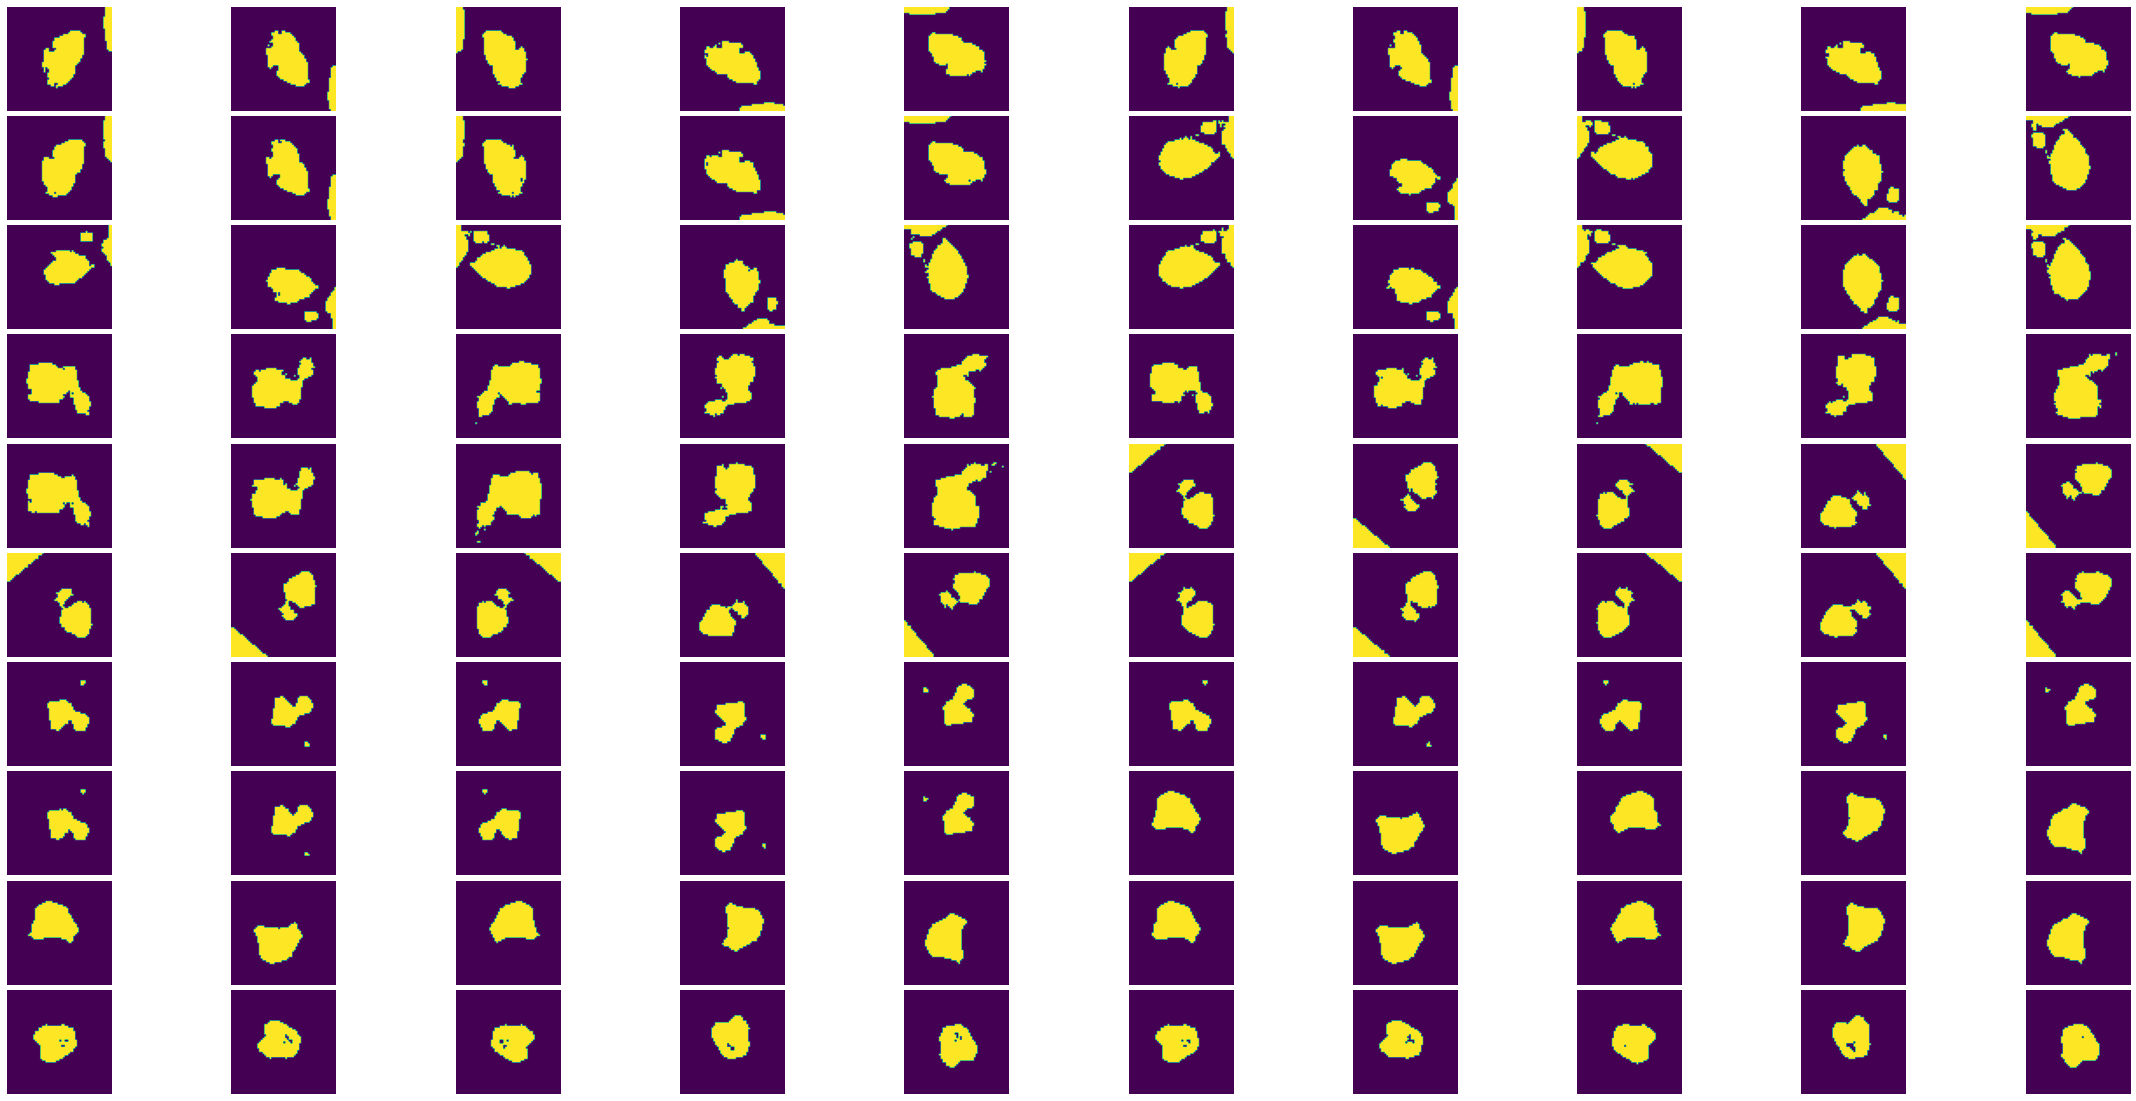

In [4]:
rows = 10
cols = 10

fig = plt.figure(figsize=(40,20))
gs = gridspec.GridSpec(rows, cols, wspace = 0.05, hspace = 0.05)
for i in range(100):
#Cell masks
    ax = fig.add_subplot(gs[i])
    ax.imshow(subimg[i+300,:,:])
    plt.axis('off')

In [5]:
# pip install atomai

In [5]:
import atomai as aoi

In [6]:
# window_size = 60
# channels = 1
# in_dim = (window_size, window_size)
# rvae= aoi.models.load_model("rvae-bw-troph-7layers-2500epochs128neurons.tar")
# rvae = aoi.models.rVAE(in_dim, translation= True,
#                         numlayers_encoder=7, numhidden_encoder=128,
#                         numlayers_decoder=7, numhidden_decoder=128,
#                        Skip = True)

# rvae.fit(subimg, training_cycles =    1000)

In [6]:
window_size = 60
channels = 1
in_dim = (window_size, window_size)
rvae = aoi.models.rVAE(in_dim, translation= True,
                        numlayers_encoder=7, numhidden_encoder=128,
                        numlayers_decoder=7, numhidden_decoder=128,
                       Skip = True)

rvae.fit(subimg, training_cycles =    1000)

/global/homes/m/m96/.local/cori/3.9-anaconda-2021.11/lib/python3.9/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
/global/homes/m/m96/.local/cori/3.9-anaconda-2021.11/lib/python3.9/site-packages/atomai/utils/preproc.py:154: UserWarning: Data type is not understood
  warnings.warn(


Epoch: 1/1000, Training loss: 164.5527
Epoch: 2/1000, Training loss: 148.6033
Epoch: 3/1000, Training loss: 137.6039
Epoch: 4/1000, Training loss: 124.0023
Epoch: 5/1000, Training loss: 112.8704
Epoch: 6/1000, Training loss: 105.8651
Epoch: 7/1000, Training loss: 102.8041
Epoch: 8/1000, Training loss: 101.4597
Epoch: 9/1000, Training loss: 100.1896
Epoch: 10/1000, Training loss: 97.8763
Epoch: 11/1000, Training loss: 95.4144
Epoch: 12/1000, Training loss: 93.2570
Epoch: 13/1000, Training loss: 91.7292
Epoch: 14/1000, Training loss: 90.4964
Epoch: 15/1000, Training loss: 89.6140
Epoch: 16/1000, Training loss: 88.7480
Epoch: 17/1000, Training loss: 87.6070
Epoch: 18/1000, Training loss: 87.1427
Epoch: 19/1000, Training loss: 86.5322
Epoch: 20/1000, Training loss: 85.7507
Epoch: 21/1000, Training loss: 85.3465
Epoch: 22/1000, Training loss: 84.7344
Epoch: 23/1000, Training loss: 84.2265
Epoch: 24/1000, Training loss: 83.9819
Epoch: 25/1000, Training loss: 83.7914
Epoch: 26/1000, Training 

In [7]:
rvae.save_model("rvae-bw-troph-7layers-1000epochs128neurons-aug_troph")

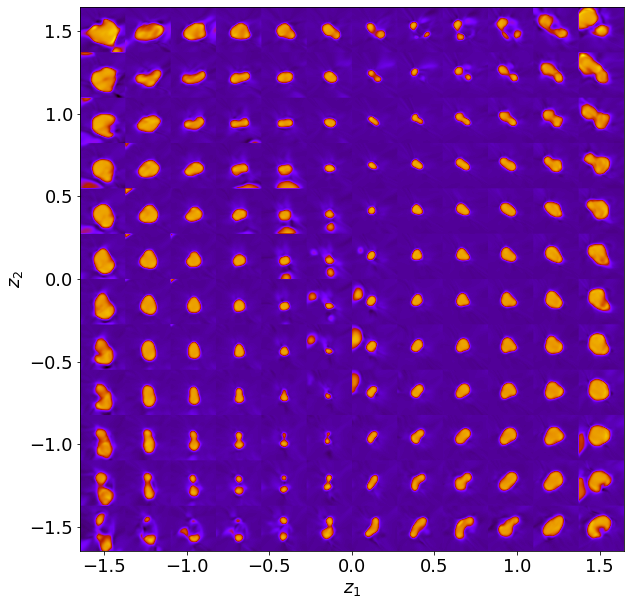

In [8]:
rvae.manifold2d(d=12);

In [9]:
a, b = rvae.encode(subimg)

[Text(0, 0.5, ''), Text(0, 0.5, '')]

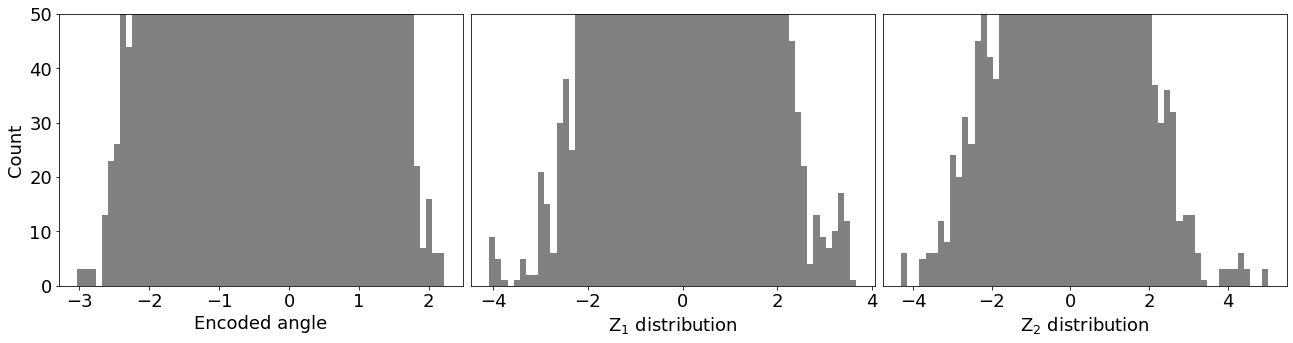

In [10]:
fig = plt.figure(figsize=(22,5))
gs = gridspec.GridSpec(1,3, wspace = 0.02)
ax1,ax2,ax3 = plt.subplot(gs[0]), plt.subplot(gs[1]), plt.subplot(gs[2])

ax1.hist(a[:,0], bins=60, color='gray')
ax2.hist(a[:, 3], bins=60, color='gray')
ax3.hist(a[:, 4], bins=60, color='gray')
ax1.set_xlabel("Encoded angle", fontsize=18)
ax2.set_xlabel("Z$_1$ distribution", fontsize=18)
ax3.set_xlabel("Z$_2$ distribution", fontsize=18)
for _ax in fig.axes:
    _ax.set_ylabel("Count", fontsize=18)
    _ax.tick_params(labelsize=18)
    _ax.set_ylim(0,50)
plt.subplots_adjust(wspace=0.3)

plt.setp([ax2,ax3], yticks=[], ylabel = '')

In [11]:
z_mean, z_sd = rvae.encode(subimg)

df = pd.DataFrame(z_mean, columns = ['Encoded Angle', 'x shift', 'y shift','Latent 1', 'Latent 2'])

x = df['Latent 1']
y = df['Latent 2']

z_mean.shape

(9270, 5)

/tmp/ipykernel_34862/1668355691.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.round(ax.get_xticks(), decimals=2), size = 12)
/tmp/ipykernel_34862/1668355691.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(np.round(ax.get_yticks(), decimals=2), size = 12)


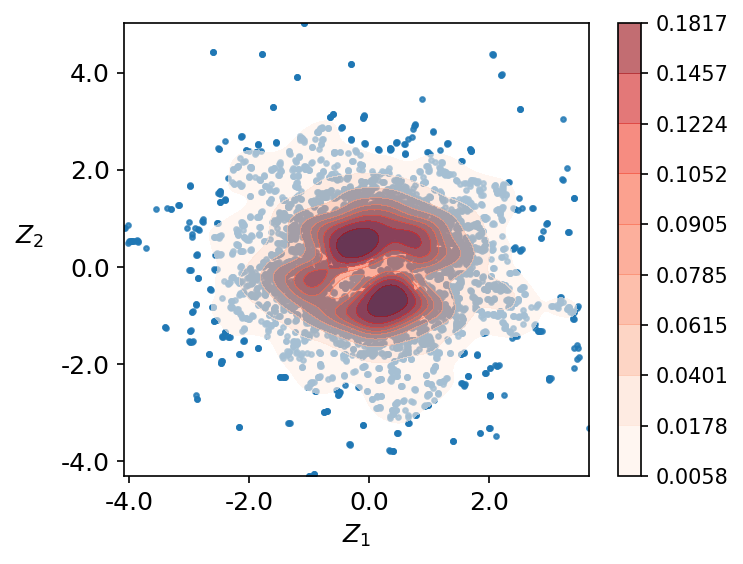

In [12]:
plt.figure(figsize=(5,4), dpi = 150)
ax = sns.regplot(x=x, y=y, fit_reg = False, scatter_kws={"s": 5})
ax = sns.kdeplot(x=x, y=y, cmap="Reds", shade=True, thresh = 0.05, cut = 0, alpha = 0.6, cbar = True)
ax.set_xlabel(xlabel = '$Z_1$', fontdict={'fontsize' : 12})
ax.set_ylabel(ylabel = '$Z_2$', fontdict={'fontsize' : 12}, rotation = 0, labelpad = 15)
ax.set_xticklabels(np.round(ax.get_xticks(), decimals=2), size = 12)
ax.set_yticklabels(np.round(ax.get_yticks(), decimals=2), size = 12)
ax.figure.axes[-1].yaxis.label.set_size(4)

In [ ]:
# window_size = 60
# channels = 1
# in_dim = (window_size, window_size)
# rvae= aoi.models.load_model("rvae-bw-troph-7layers-2500epochs128neurons.tar")
# rvae = aoi.models.rVAE(in_dim, translation= True,
#                         numlayers_encoder=7, numhidden_encoder=512,
#                         numlayers_decoder=7, numhidden_decoder=512,
#                        Skip = True)

# rvae.fit(subimg, training_cycles =    500)

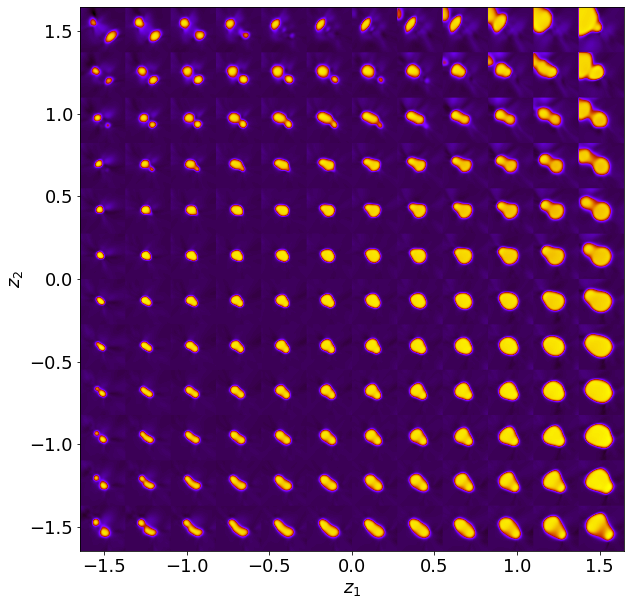

In [26]:
rvae.manifold2d(d=12);

[Text(0, 0.5, ''), Text(0, 0.5, '')]

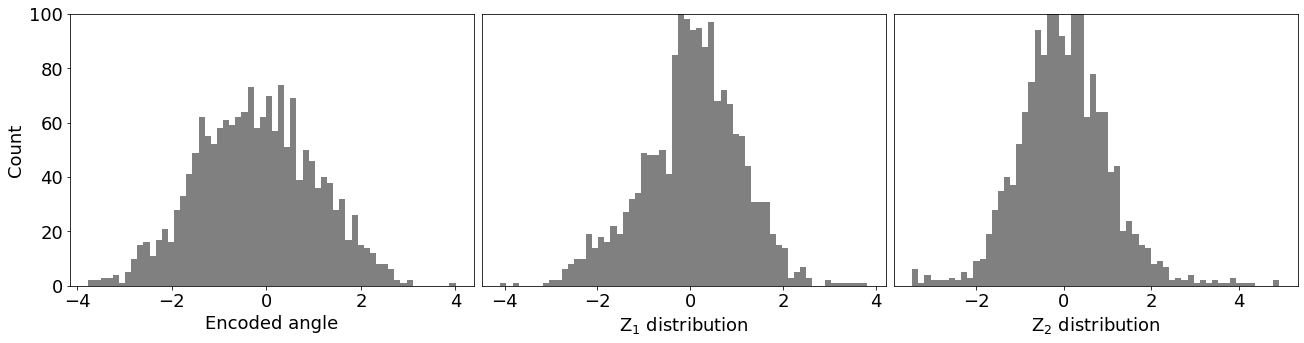

In [10]:
fig = plt.figure(figsize=(22,5))
gs = gridspec.GridSpec(1,3, wspace = 0.02)
ax1,ax2,ax3 = plt.subplot(gs[0]), plt.subplot(gs[1]), plt.subplot(gs[2])

ax1.hist(a[:,0], bins=60, color='gray')
ax2.hist(a[:, 3], bins=60, color='gray')
ax3.hist(a[:, 4], bins=60, color='gray')
ax1.set_xlabel("Encoded angle", fontsize=18)
ax2.set_xlabel("Z$_1$ distribution", fontsize=18)
ax3.set_xlabel("Z$_2$ distribution", fontsize=18)
for _ax in fig.axes:
    _ax.set_ylabel("Count", fontsize=18)
    _ax.tick_params(labelsize=18)
    _ax.set_ylim(0,100)
plt.subplots_adjust(wspace=0.3)

plt.setp([ax2,ax3], yticks=[], ylabel = '')

In [11]:
z_mean, z_sd = rvae.encode(subimg)

df = pd.DataFrame(z_mean, columns = ['Encoded Angle', 'x shift', 'y shift','Latent 1', 'Latent 2'])

x = df['Latent 1']
y = df['Latent 2']

z_mean.shape

(1685, 5)

/tmp/ipykernel_63269/1668355691.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.round(ax.get_xticks(), decimals=2), size = 12)
/tmp/ipykernel_63269/1668355691.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(np.round(ax.get_yticks(), decimals=2), size = 12)


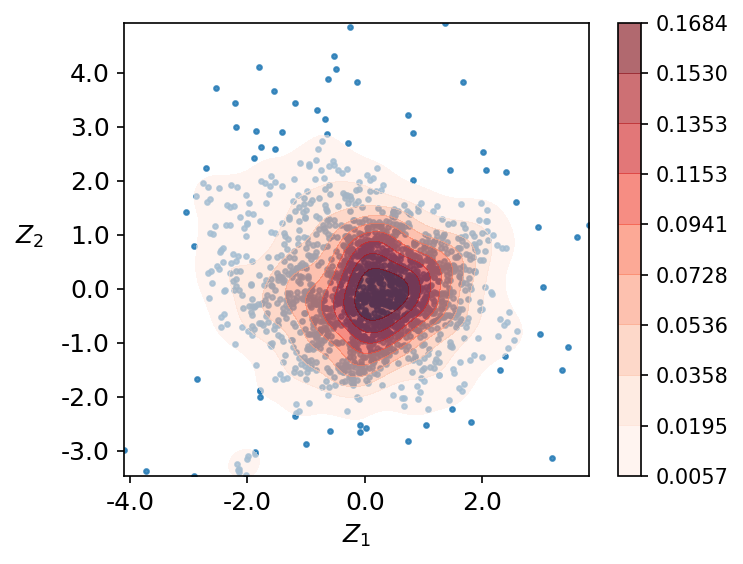

In [ ]:
plt.figure(figsize=(5,4), dpi = 150)
ax = sns.regplot(x=x, y=y, fit_reg = False, scatter_kws={"s": 5})
ax = sns.kdeplot(x=x, y=y, cmap="Reds", shade=True, thresh = 0.05, cut = 0, alpha = 0.6, cbar = True)
ax.set_xlabel(xlabel = '$Z_1$', fontdict={'fontsize' : 12})
ax.set_ylabel(ylabel = '$Z_2$', fontdict={'fontsize' : 12}, rotation = 0, labelpad = 15)
ax.set_xticklabels(np.round(ax.get_xticks(), decimals=2), size = 12)
ax.set_yticklabels(np.round(ax.get_yticks(), decimals=2), size = 12)
ax.figure.axes[-1].yaxis.label.set_size(4)

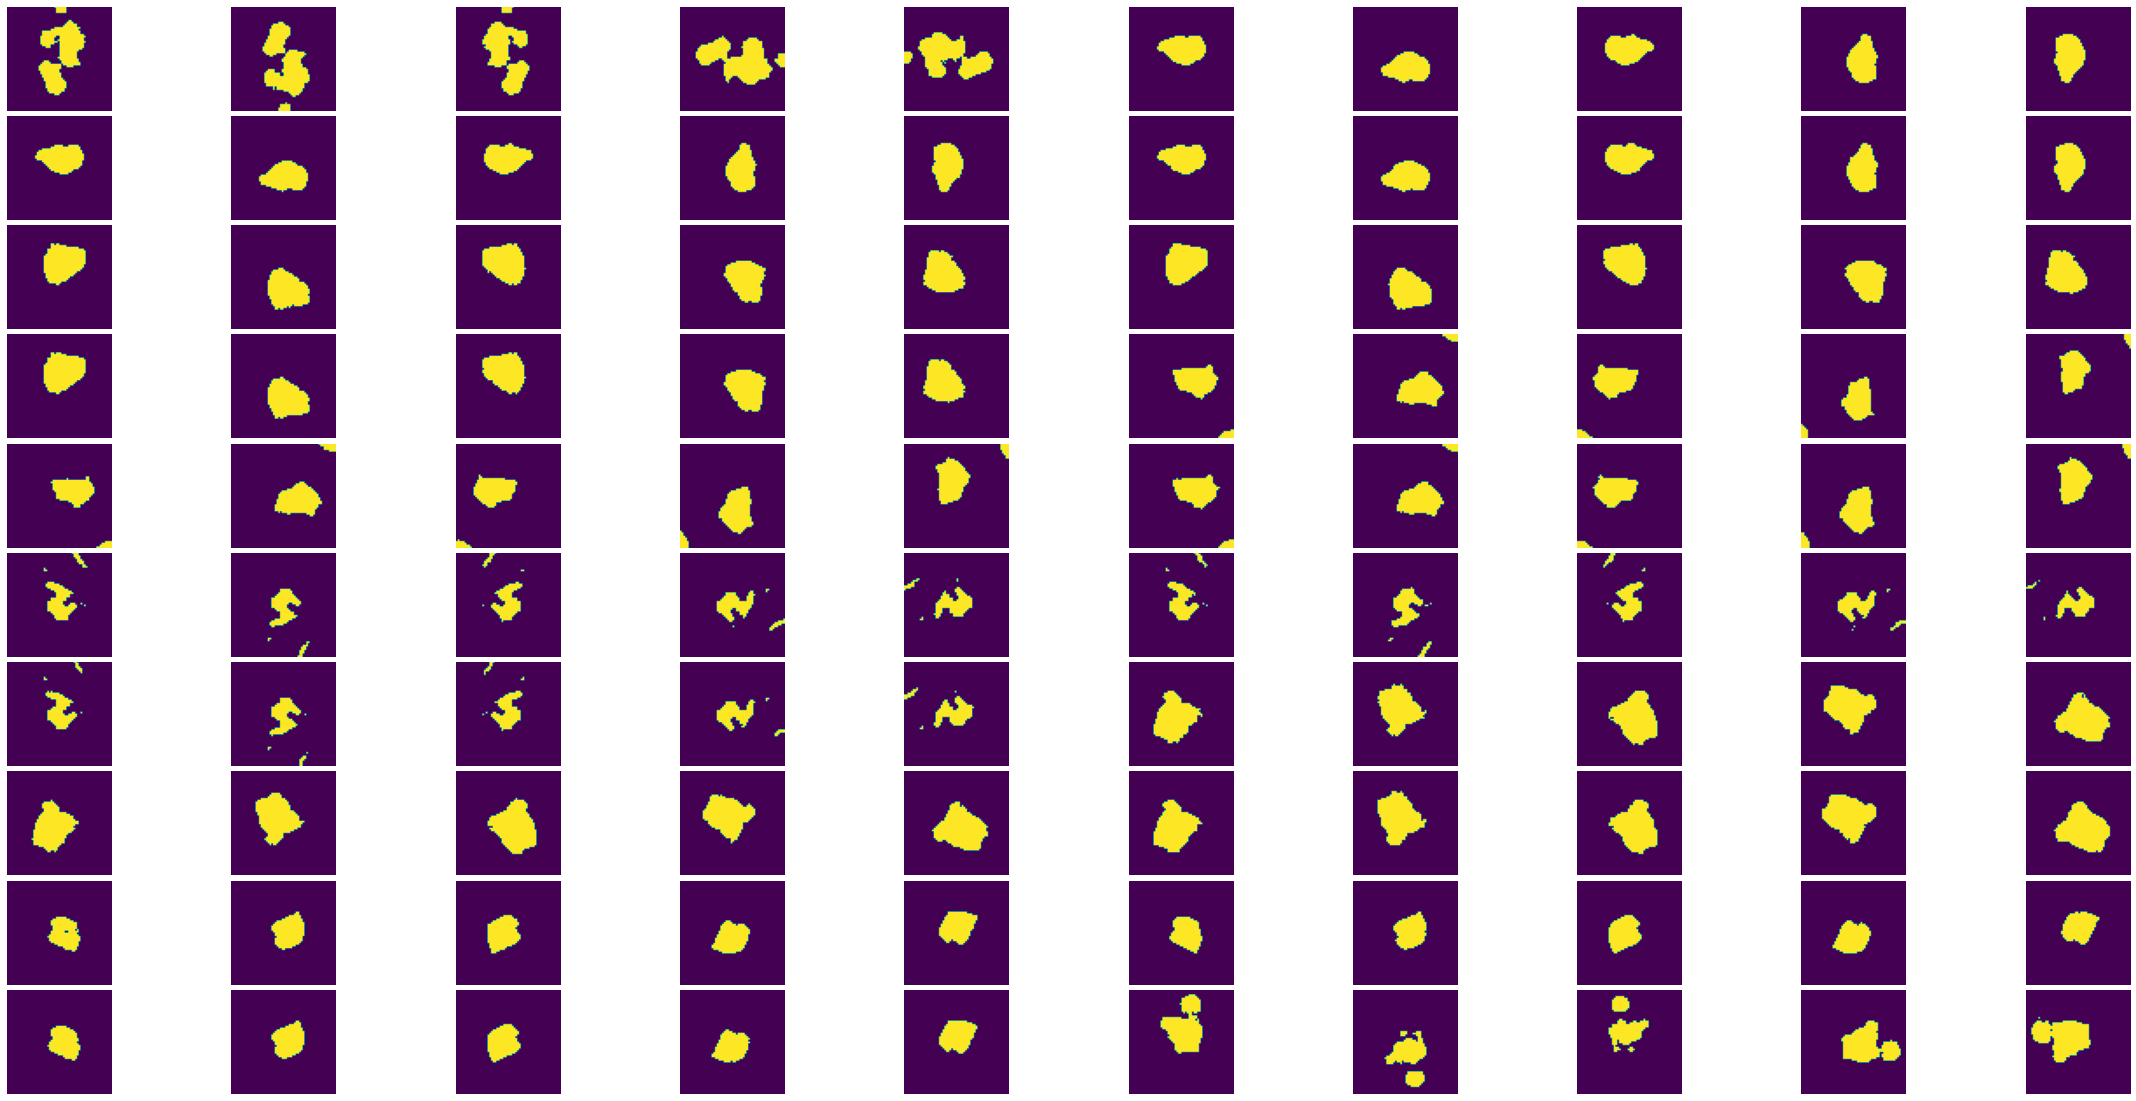

In [15]:
rows = 10
cols = 10

fig = plt.figure(figsize=(40,20))
gs = gridspec.GridSpec(rows, cols, wspace = 0.05, hspace = 0.05)
for i in range(100):
#Cell masks
    ax = fig.add_subplot(gs[i])
    ax.imshow(subimg[i+1000,:,:])
    plt.axis('off')

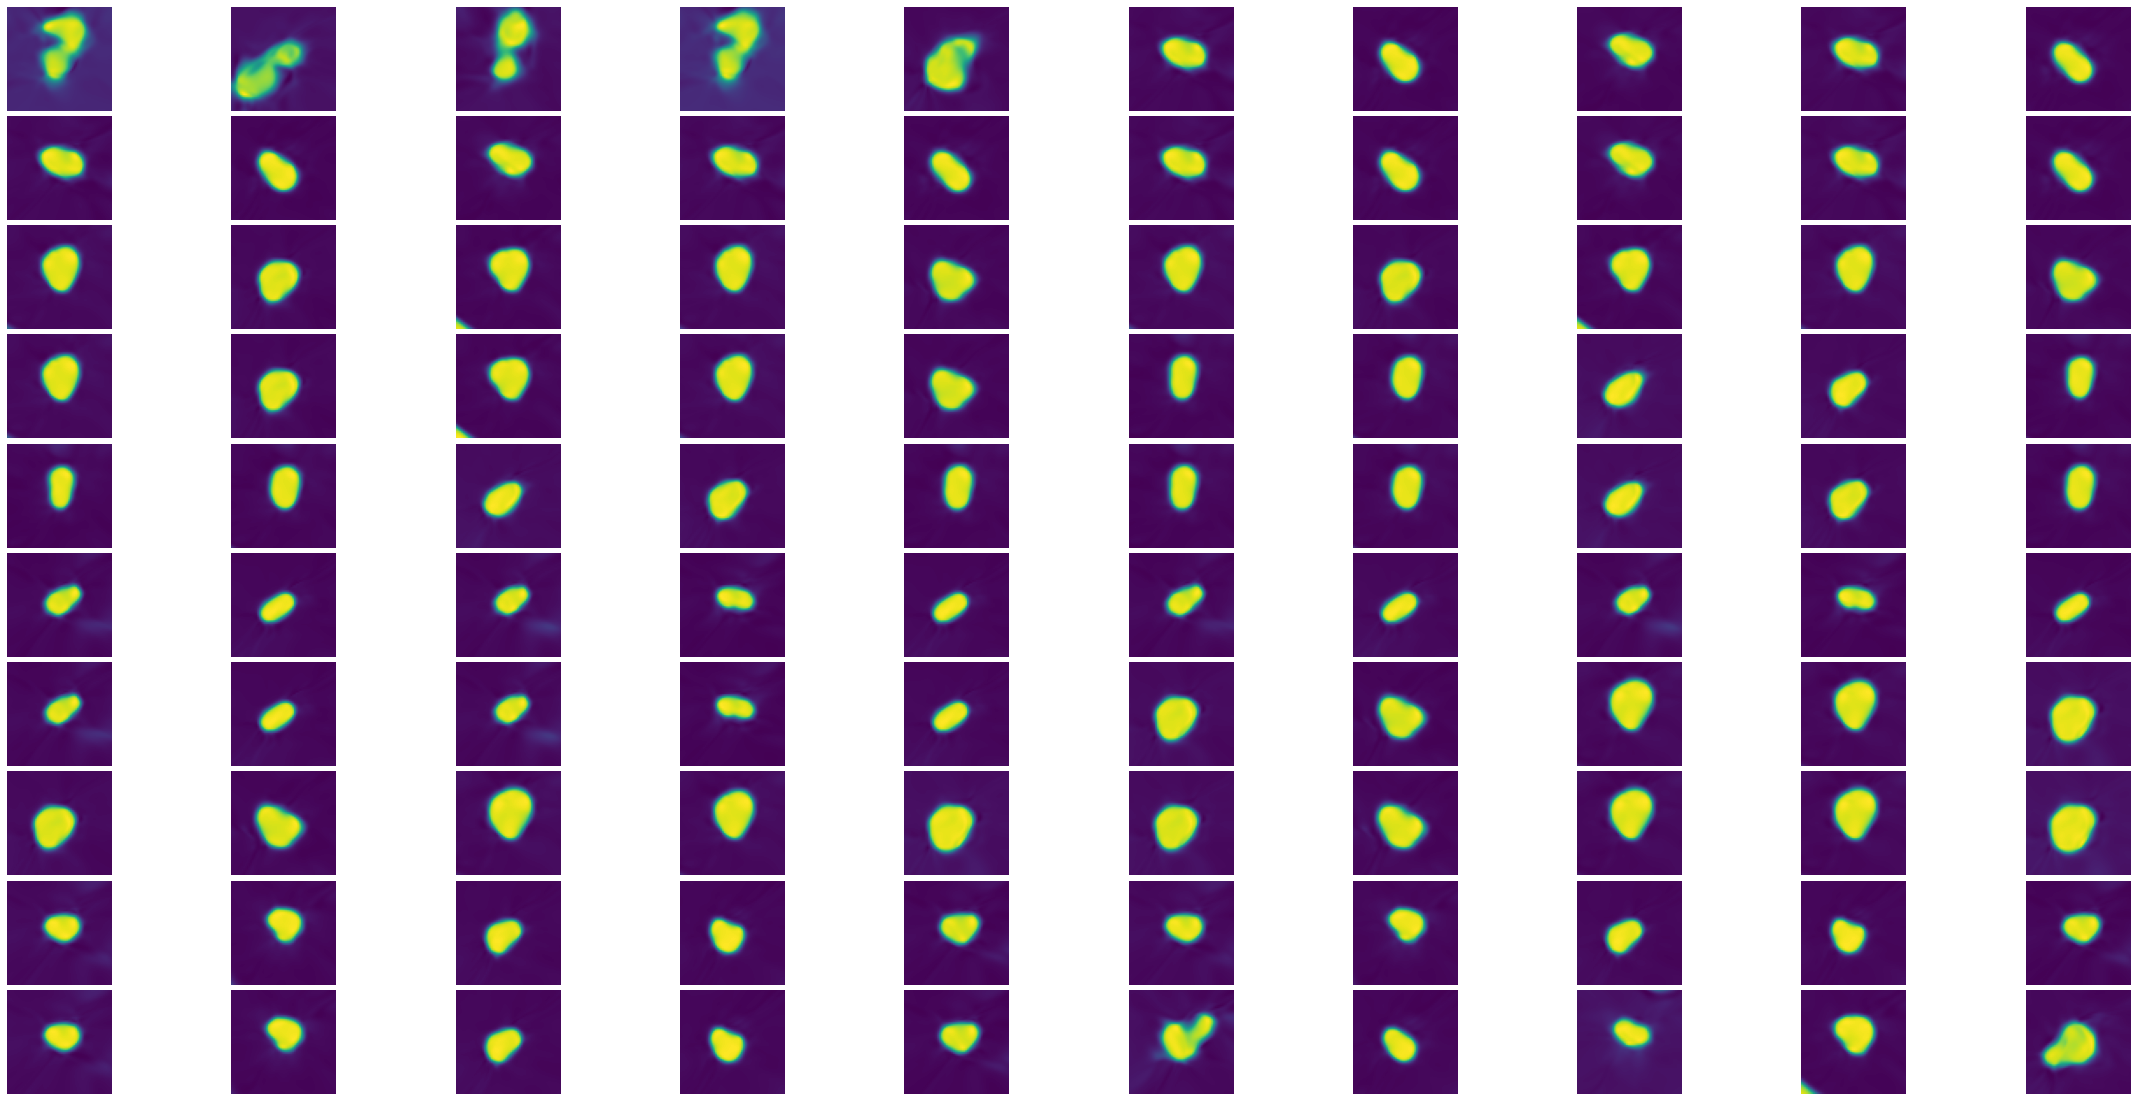

In [16]:
n=1000
list_d_subimg = []    
for i in range(100):
    ae, be = rvae.encode(subimg[n+i])
    d_subimg = rvae.decode(ae[:,3:])
    list_d_subimg.append(d_subimg)
    
rows = 10
cols = 10

fig = plt.figure(figsize=(40,20))
gs = gridspec.GridSpec(rows, cols, wspace = 0.05, hspace = 0.05)
for i in range(100):
#Cell masks
    ax = fig.add_subplot(gs[i])
    ax.imshow(list_d_subimg[i][0])
    plt.axis('off')

In [31]:
window_size = 60
channels = 1
in_dim = (window_size, window_size)
# vae= aoi.models.load_model("vae-bw-troph-7layers-2500epochs128neurons.tar")
vae = aoi.models.VAE(in_dim,
                       numlayers_encoder=7, numhidden_encoder=128,
                       numlayers_decoder=7, numhidden_decoder=128,
                       Skip = True)

vae.fit(subimg, training_cycles =    2500)

Epoch: 1/2500, Training loss: 180.5238
Epoch: 2/2500, Training loss: 140.3410
Epoch: 3/2500, Training loss: 125.1147
Epoch: 4/2500, Training loss: 120.8215
Epoch: 5/2500, Training loss: 117.8599
Epoch: 6/2500, Training loss: 117.2479
Epoch: 7/2500, Training loss: 116.9299
Epoch: 8/2500, Training loss: 117.0954
Epoch: 9/2500, Training loss: 116.3736
Epoch: 10/2500, Training loss: 116.8848
Epoch: 11/2500, Training loss: 116.6341
Epoch: 12/2500, Training loss: 116.6657
Epoch: 13/2500, Training loss: 116.3953
Epoch: 14/2500, Training loss: 116.3135
Epoch: 15/2500, Training loss: 116.2236
Epoch: 16/2500, Training loss: 116.2358
Epoch: 17/2500, Training loss: 116.1531
Epoch: 18/2500, Training loss: 115.7016
Epoch: 19/2500, Training loss: 115.6892
Epoch: 20/2500, Training loss: 115.5572
Epoch: 21/2500, Training loss: 114.9407
Epoch: 22/2500, Training loss: 115.7528
Epoch: 23/2500, Training loss: 115.4599
Epoch: 24/2500, Training loss: 115.0264
Epoch: 25/2500, Training loss: 114.6058
Epoch: 26

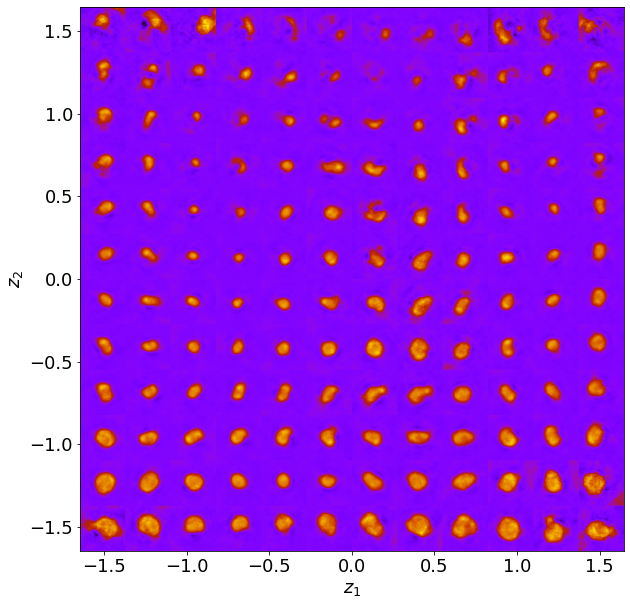

In [34]:
vae.manifold2d(d=12);

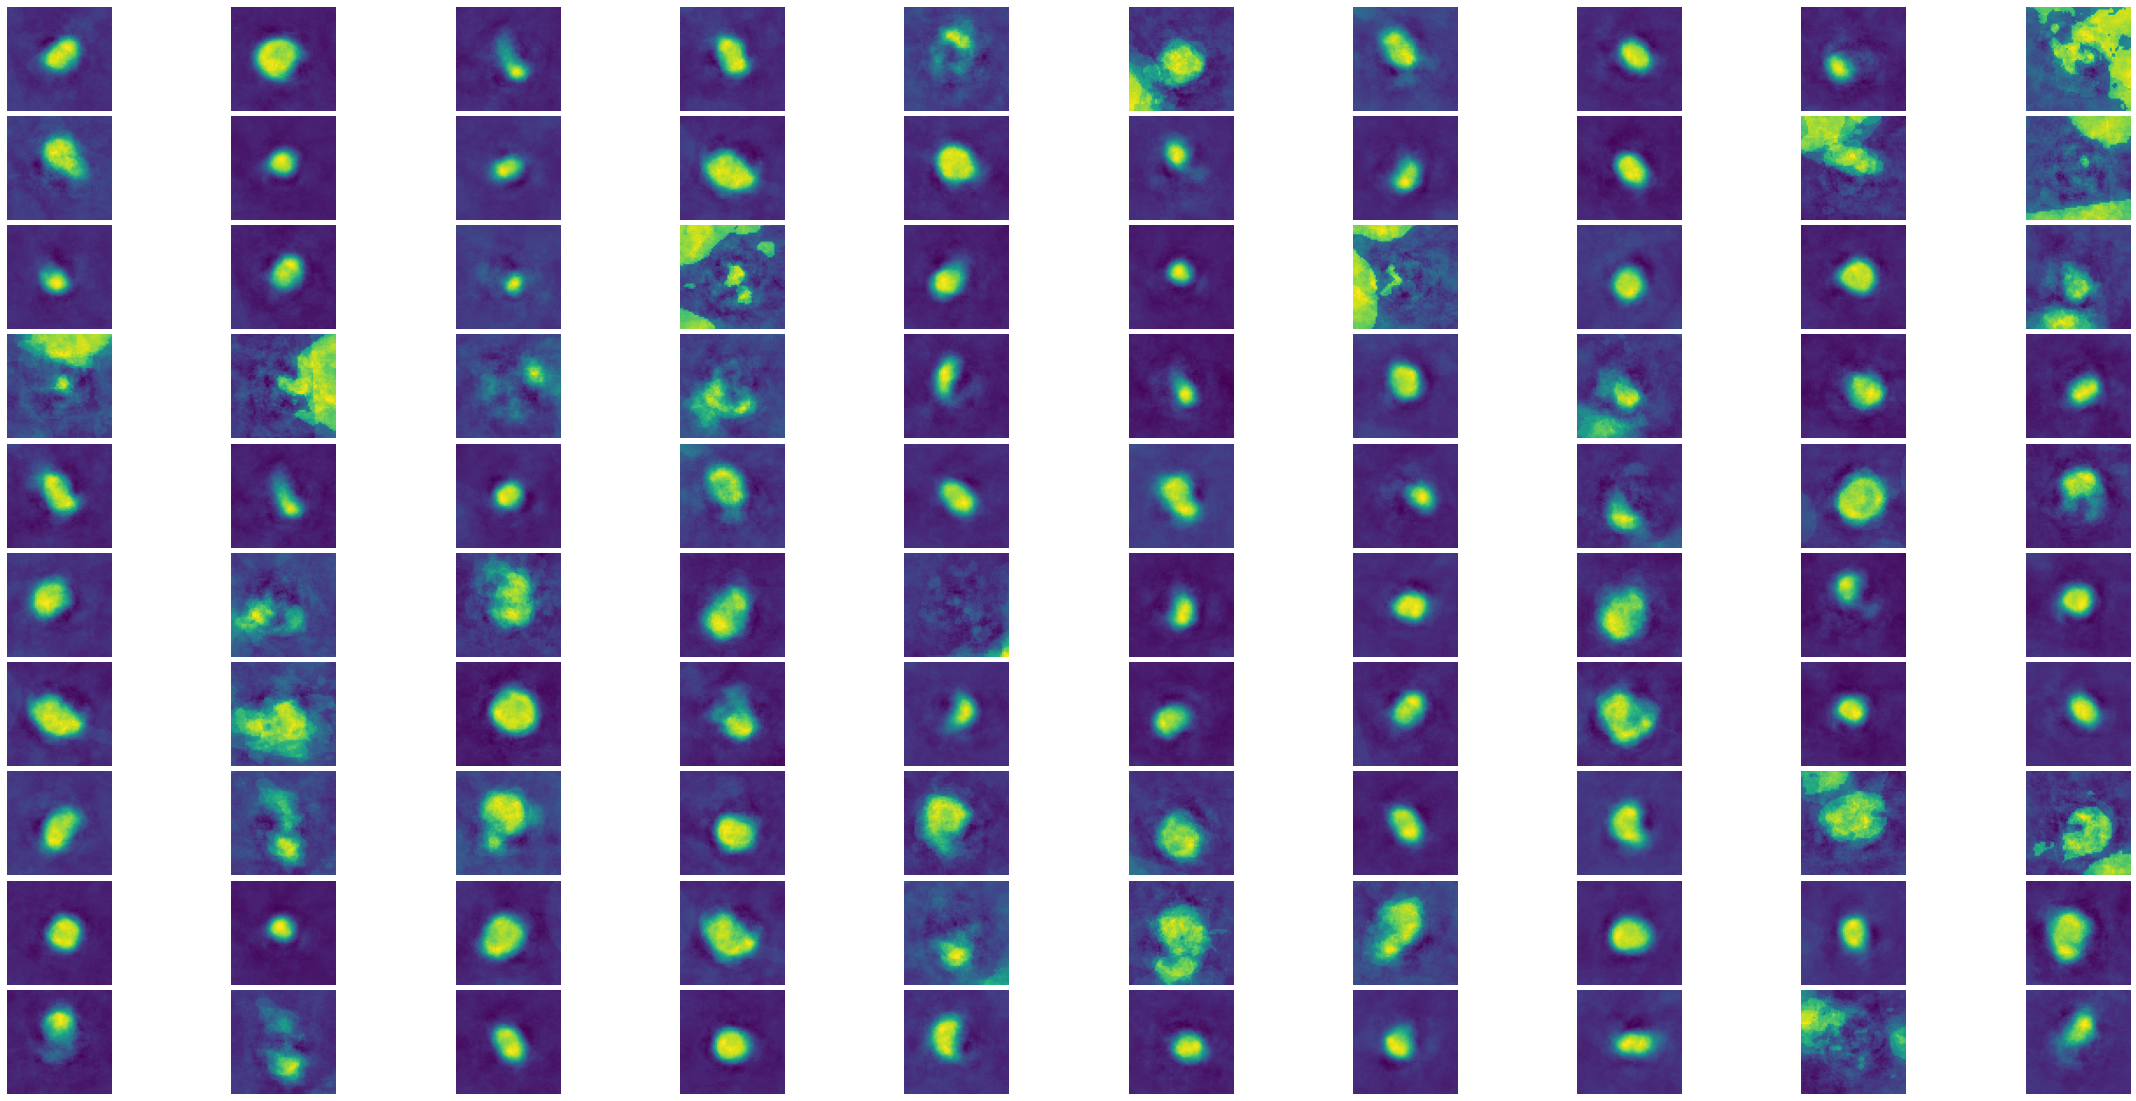

In [33]:
n=300
list_d_subimg = []    
for i in range(100):
    ae, be = vae.encode(subimg[n+i])
    d_subimg = vae.decode(ae)
    list_d_subimg.append(d_subimg)
    
rows = 10
cols = 10

fig = plt.figure(figsize=(40,20))
gs = gridspec.GridSpec(rows, cols, wspace = 0.05, hspace = 0.05)
for i in range(100):
#Cell masks
    ax = fig.add_subplot(gs[i])
    ax.imshow(list_d_subimg[i][0])
    plt.axis('off')

In [37]:
z_mean, z_sd = vae.encode(subimg)

df = pd.DataFrame(z_mean, columns = ['Latent 1', 'Latent 2'])

x = df['Latent 1']
y = df['Latent 2']

z_mean.shape

(1685, 2)

/tmp/ipykernel_63269/1668355691.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.round(ax.get_xticks(), decimals=2), size = 12)
/tmp/ipykernel_63269/1668355691.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(np.round(ax.get_yticks(), decimals=2), size = 12)


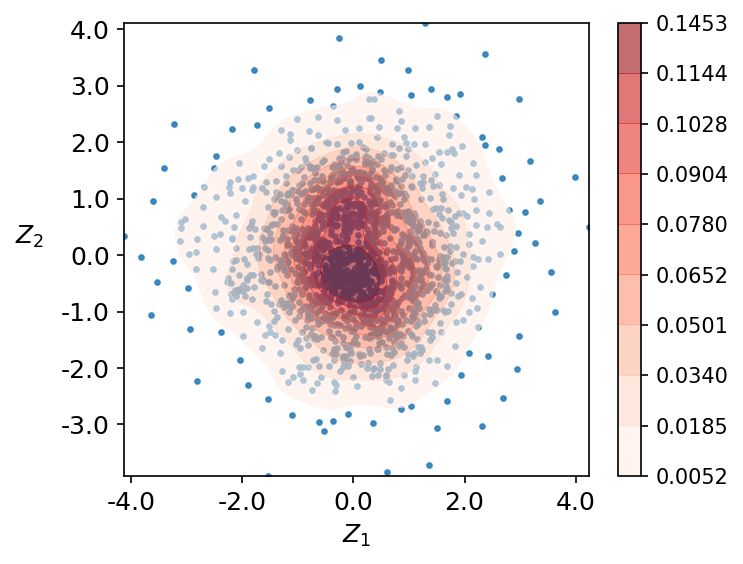

In [38]:
plt.figure(figsize=(5,4), dpi = 150)
ax = sns.regplot(x=x, y=y, fit_reg = False, scatter_kws={"s": 5})
ax = sns.kdeplot(x=x, y=y, cmap="Reds", shade=True, thresh = 0.05, cut = 0, alpha = 0.6, cbar = True)
ax.set_xlabel(xlabel = '$Z_1$', fontdict={'fontsize' : 12})
ax.set_ylabel(ylabel = '$Z_2$', fontdict={'fontsize' : 12}, rotation = 0, labelpad = 15)
ax.set_xticklabels(np.round(ax.get_xticks(), decimals=2), size = 12)
ax.set_yticklabels(np.round(ax.get_yticks(), decimals=2), size = 12)
ax.figure.axes[-1].yaxis.label.set_size(4)

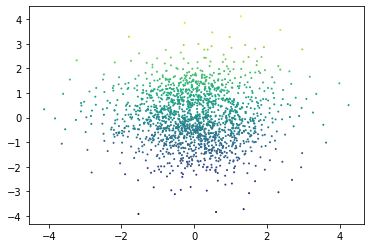

In [45]:
# z_mean, z_sd = vae.encode(subimg)
# plt.scatter(z_mean[:,0], z_mean[:,1], c = z_mean[:,1], s = 1)

In [18]:
window_size = 60
channels = 1
in_dim = (window_size, window_size)
rvae = aoi.models.load_model("rvae-malaria-Jhon-bw-2500epochs-128neurons-100latendim.tar")
# rvae = aoi.models.rVAE(in_dim, translation= True,
#                         numlayers_encoder=7, numhidden_encoder=128,
#                         numlayers_decoder=7, numhidden_decoder=128,
#                         Skip = True, latent_dim = 100)

rvae.fit(subimg, training_cycles =    500)

/global/homes/m/m96/.local/cori/3.9-anaconda-2021.11/lib/python3.9/site-packages/atomai/utils/preproc.py:154: UserWarning: Data type is not understood
  warnings.warn(


Epoch: 1/500, Training loss: 56.0805
Epoch: 2/500, Training loss: 56.2871
Epoch: 3/500, Training loss: 56.2076
Epoch: 4/500, Training loss: 56.2624
Epoch: 5/500, Training loss: 56.1639
Epoch: 6/500, Training loss: 55.9755
Epoch: 7/500, Training loss: 56.2471
Epoch: 8/500, Training loss: 56.3311
Epoch: 9/500, Training loss: 55.9216
Epoch: 10/500, Training loss: 56.2198
Epoch: 11/500, Training loss: 56.3418
Epoch: 12/500, Training loss: 56.0467
Epoch: 13/500, Training loss: 56.3223
Epoch: 14/500, Training loss: 56.1816
Epoch: 15/500, Training loss: 56.2474
Epoch: 16/500, Training loss: 56.3250
Epoch: 17/500, Training loss: 56.2932
Epoch: 18/500, Training loss: 56.2918
Epoch: 19/500, Training loss: 56.3070
Epoch: 20/500, Training loss: 56.2218
Epoch: 21/500, Training loss: 55.9008
Epoch: 22/500, Training loss: 56.1296
Epoch: 23/500, Training loss: 56.2468
Epoch: 24/500, Training loss: 56.1633
Epoch: 25/500, Training loss: 55.7813
Epoch: 26/500, Training loss: 56.2837
Epoch: 27/500, Traini

In [19]:
rvae.save_model("rvae-malaria-Jhon-bw-3000epochs-128neurons-100latendim")

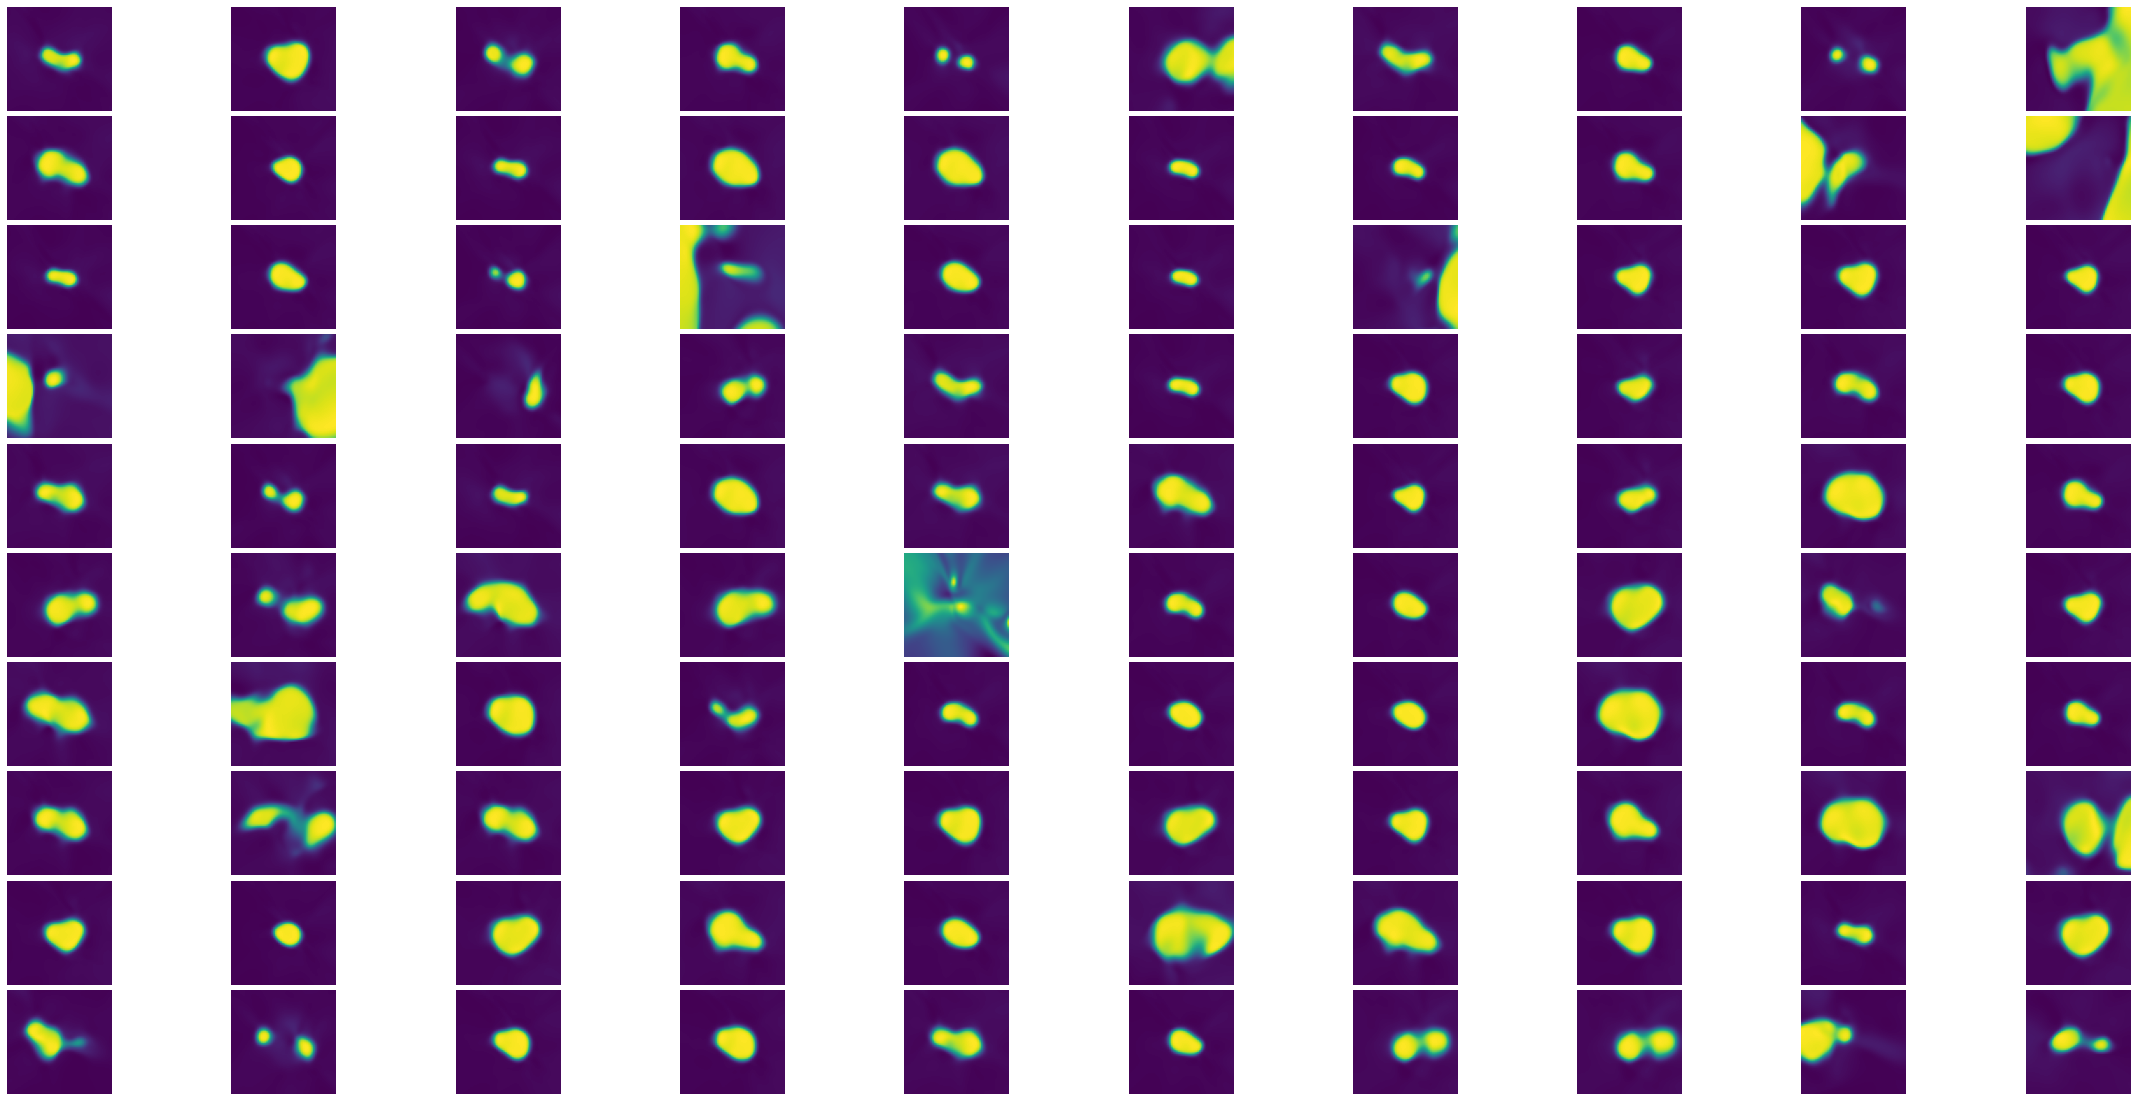

In [20]:
n=300
list_d_subimg = []    
for i in range(100):
    ae, be = rvae.encode(subimg[n+i])
    d_subimg = rvae.decode(ae[:,3:])
    list_d_subimg.append(d_subimg)
    
rows = 10
cols = 10

fig = plt.figure(figsize=(40,20))
gs = gridspec.GridSpec(rows, cols, wspace = 0.05, hspace = 0.05)
for i in range(100):
#Cell masks
    ax = fig.add_subplot(gs[i])
    ax.imshow(list_d_subimg[i][0])
    plt.axis('off')

In [239]:
# # Encoded class

# import torch
# import torch.tensor as tt
# from atomai.utils import to_onehot

# k = 1500 # image in stack
# n_samples = 20 # number of z samples (cont)

# # Encode input
# z_mean, z_sd, c = jrvae.encode(imstack_train[k])
# z_mean, z_sd = tt(z_mean[:, 3:]), tt(z_sd[:, 3:])

# # Sample z (multiple times)
# d = torch.distributions.Normal(z_mean, z_sd.exp())
# z_samples = []
# for i in range(n_samples):
#     z_samples.append(d.rsample())
# z_samples = torch.cat(z_samples)
# # Get one-hot encoded vector for a given class
# alphas = tt(c).repeat(n_samples, 1)
# # Concatenate cont and disc vectors
# latent_vector = torch.cat([z_samples, alphas], dim=1)

# # Decode
# decoded = jrvae.decode(latent_vector)
# decoded_mean = decoded.mean(0)
# decoded_var = decoded.var(0)

In [240]:
# print(decoded.shape)

# _, (ax0, ax1, ax2, ax3) = plt.subplots(1,4, figsize = (16,4))
# ax0.imshow(particles_all[100])
# ax1.imshow(imstack_train[100])
# ax2.imshow(decoded_mean)
# ax3.imshow(decoded_var)

In [46]:
window_size = 60
channels = 1
in_dim = (window_size, window_size)
# jrvae= aoi.models.load_model("jrvae-malaria-Jhon-bw-250epochs-512neurons.tar")
jrvae = aoi.models.jrVAE(in_dim, latent_dim=2, discrete_dim=[3],translation= True,
                        numlayers_encoder=7, numhidden_encoder=512,
                        numlayers_decoder=7, numhidden_decoder=512,
                        Skip = True)
jrvae.fit(subimg,training_cycles=500)

/global/homes/m/m96/.local/cori/3.9-anaconda-2021.11/lib/python3.9/site-packages/atomai/utils/preproc.py:154: UserWarning: Data type is not understood
  warnings.warn(


Epoch: 1/500, Training loss: 345.2302
Epoch: 2/500, Training loss: 157.3446
Epoch: 3/500, Training loss: 152.3228
Epoch: 4/500, Training loss: 149.3827
Epoch: 5/500, Training loss: 146.9385
Epoch: 6/500, Training loss: 145.2363
Epoch: 7/500, Training loss: 140.1561
Epoch: 8/500, Training loss: 140.4528
Epoch: 9/500, Training loss: 137.4159
Epoch: 10/500, Training loss: 136.3366
Epoch: 11/500, Training loss: 136.0722
Epoch: 12/500, Training loss: 133.8275
Epoch: 13/500, Training loss: 130.4742
Epoch: 14/500, Training loss: 128.0831
Epoch: 15/500, Training loss: 126.3665
Epoch: 16/500, Training loss: 124.2165
Epoch: 17/500, Training loss: 123.0065
Epoch: 18/500, Training loss: 121.8258
Epoch: 19/500, Training loss: 120.2155
Epoch: 20/500, Training loss: 120.6003
Epoch: 21/500, Training loss: 118.3516
Epoch: 22/500, Training loss: 119.0202
Epoch: 23/500, Training loss: 118.0087
Epoch: 24/500, Training loss: 117.0889
Epoch: 25/500, Training loss: 115.3902
Epoch: 26/500, Training loss: 114.

In [47]:
jrvae.save_model("jrvae-bw-troph-7layers-500epochs128neurons")

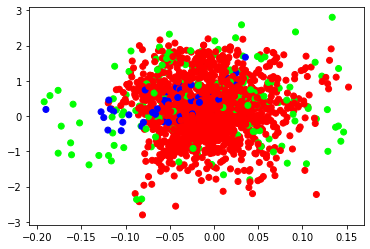

In [48]:
a, b, c = jrvae.encode(subimg)
plt.scatter(a[:,3], a[:,4], c = c)

In [ ]:
a.shape, b.shape, c.shape

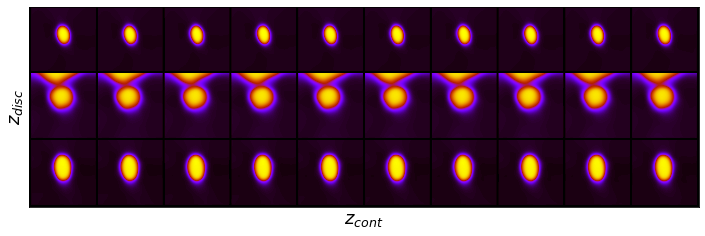

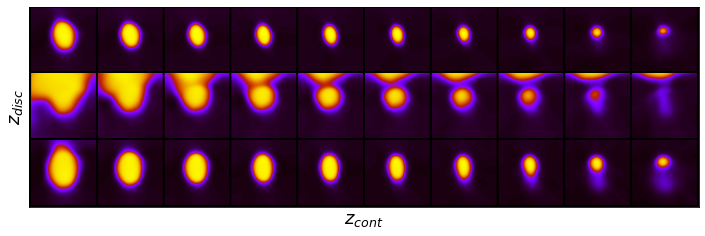

In [49]:
for i in range(2):
    jrvae.manifold_traversal(i);

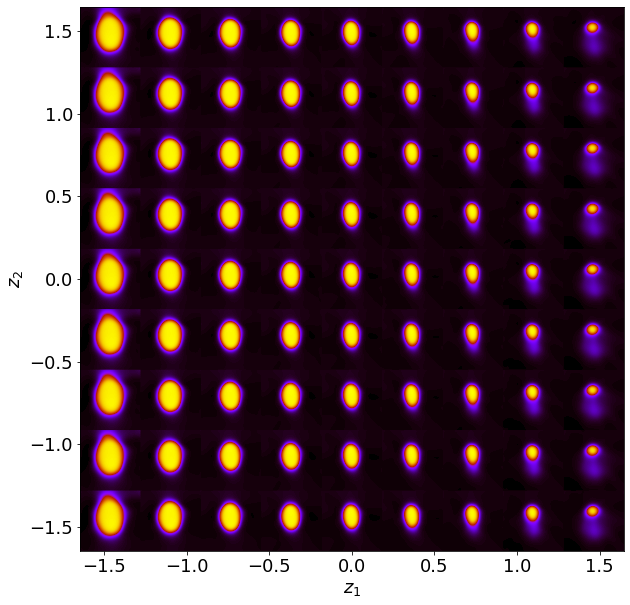

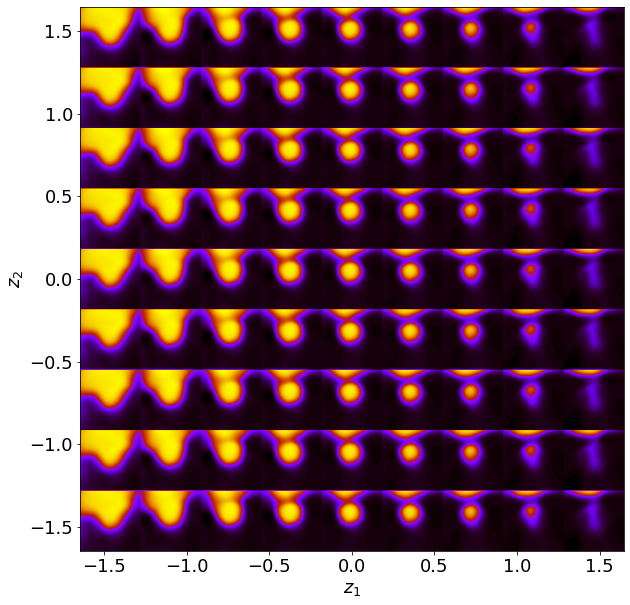

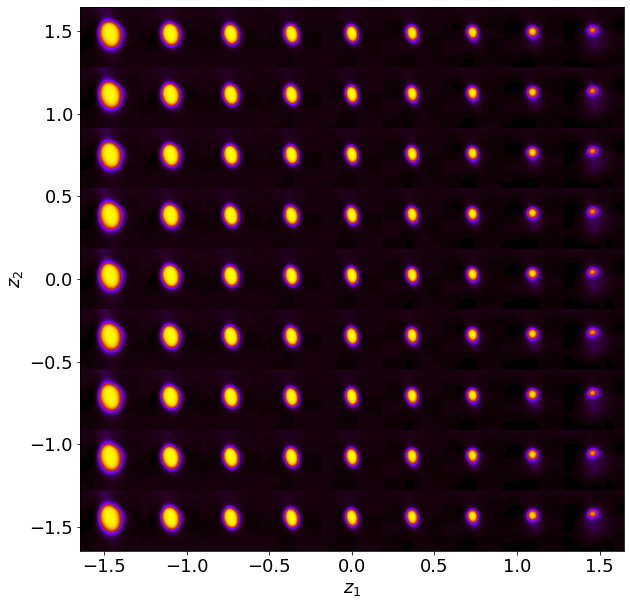

In [50]:
for i in range(3):
    jrvae.manifold2d(disc_idx=i)

In [51]:
ci = np.array([np.argmax(cl) for cl in c])
data = np.hstack((np.expand_dims(ci, axis = 1)))

data = pd.DataFrame(data, columns=['Class'])

data = pd.concat([data,pd.get_dummies(data['Class'], 
                                      prefix='Class',dummy_na=False)],axis=1).drop(['Class'],axis=1)
data.tail()

Class_0  Class_1  Class_2
1680        1        0        0
1681        0        1        0
1682        1        0        0
1683        0        0        1
1684        1        0        0

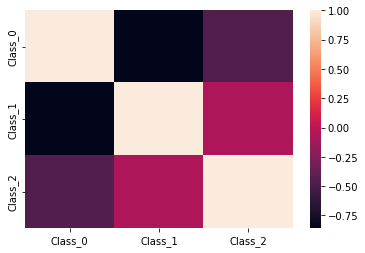

In [52]:
ax = sns.heatmap(data.corr())